# **Descente de gradient**


### Import des librairies

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### Chargement des données House Prices Boston

In [ ]:
dataset = load_boston()

X = dataset['data']
Y = dataset['target']

attributs = dataset['feature_names']

print('La liste des attributs:',attributs)

print('Nomrbre d\'instances est:',X.shape[0])
print('Nomrbre d\'attributs est:',X.shape[1])

La liste des attributs: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Nomrbre d'instances est: 506
Nomrbre d'attributs est: 13


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

### Décomposer les données en ensembles de train et de test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size= 33/100)

print('Nombre d\'instance pour entrainement:',X_train.shape[0])
print('Nombre d\'instance pour le test:',X_test.shape[0])

Nombre d'instance pour entrainement: 339
Nombre d'instance pour le test: 167


### Normaliser `x_train` pour que toutes les caractéristiques soient entre `0` et `1`

In [ ]:
X_train = normalize(X_train)
X_test = normalize(X_test)

### Choisir les attributs sur lequels on va travailler

In [ ]:
index_des_attributs = [5,12]

x_train = X_train[:,index_des_attributs]
x_test = X_test[:,index_des_attributs]

## Créer un modèle de regression linéaire avec Keras

### Créer la couche d'entrée qui a la même "shape" que celle d'une instance dans `x_train`

In [ ]:
input_shape = x_train.shape[1:]

input_layer = keras.layers.Input(input_shape)

### Créer une couche de sortie qui contient un neurone linéaire qui prend en entrée le `input_layer`

In [ ]:
output_layer = keras.layers.Dense(units=1, activation='linear')(input_layer)

### Créer maintenant le modèle (qui est un perceptron)

In [ ]:
model = keras.models.Model(inputs=input_layer, outputs=output_layer)

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


### Choisir l'algorithme d'optimisation avec un learning rate de `0.1`

In [ ]:
learning_rate = 0.1
optimizer_algo = keras.optimizers.SGD(learning_rate=learning_rate)

### Choisir la fonction de coût qu'on veut optimiser : Mean Squared Error

In [ ]:
cost_function = keras.losses.mean_squared_error

### Compiler le modèle

In [ ]:
model.compile(loss=cost_function,optimizer=optimizer_algo)

### Entrainer le modèle avec un batch size de 32 pour 100 époques

In [ ]:
mini_batch_size = 16
nb_epochs = 1000
history = model.fit(x_train,y_train,batch_size=mini_batch_size,epochs=nb_epochs,verbose=0)

### Tracer la variation du taux d'erreur sur le train en fonction du nombre d'époques

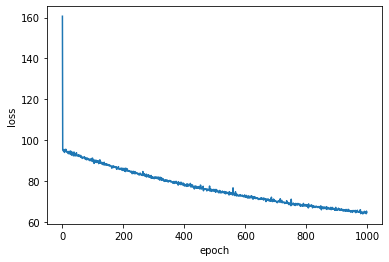

In [ ]:
history_dict = history.history
loss_epochs = history_dict['loss']

plt.figure()
plt.plot(loss_epochs)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
plt.close()

### Evaluer ce modèle sur l'ensemble du test

In [ ]:
loss = model.evaluate(x_train,y_train,verbose=False)

print("Le taux d'erreur sur l'ensemble du train est:",loss)

Le taux d'erreur sur l'ensemble du train est: 64.09117889404297


## Tracer et visualiser la prédiction dans le cas d'une droite ou d'un plan

### Tracer les données sans la décision

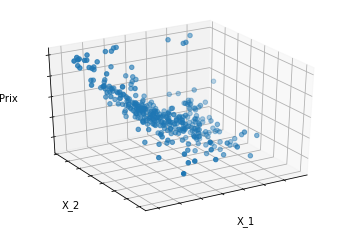

In [ ]:
if len(index_des_attributs) == 1:
  # donc on utilise une droite
  # deux points suffisent pour tracer le modèle
  point1 = x_train.min()
  point2 = x_train.max()
  X = [point1,point2]
  # prédire pour l'ensemble de X
  y_pred = model.predict(X)
  # tracer
  plt.figure()
  plt.ylabel('prix de la maison')
  plt.xlabel('attribut')
  plt.scatter(x_train,y_train)
  plt.show()
  plt.close()

elif len(index_des_attributs) == 2:
  # deux paramètres à apprendre donc espace 3D

  # créer la figure
  fig = plt.figure()
  # préciser que c'est 3D
  plot3d = fig.add_subplot(111,projection='3d')
  # chercher les axes
  ax = plt.gca()

  # ajouter l'angle de vue
  ax.view_init(elev=None, azim=59)
  # tracer les points correspondant aux données d'entrainement
  plot3d.scatter(x_train[:,0],x_train[:,1],y_train)

  # enlever les valeurs sur les axes (pour une meilleure visualisation)
  ax.set_xticklabels([])
  ax.set_yticklabels([])
  ax.set_zticklabels([])

  # annoter les axes
  ax.set_xlabel('X_1')
  ax.set_ylabel('X_2')
  ax.set_zlabel('Prix')

  plt.show()
  plt.close()

### Récupérer les paramètres appris

In [ ]:
learned_parameters = model.layers[-1].get_weights()

W = learned_parameters[0]
b = learned_parameters[1]

print('W=',W)
print('b=',b)

W= [[  67.87032]
 [-243.71046]]
b= [27.878397]


### Tracer la décision

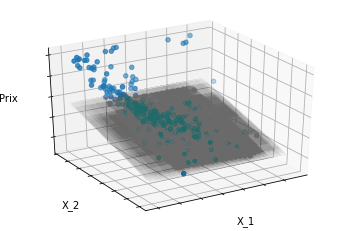

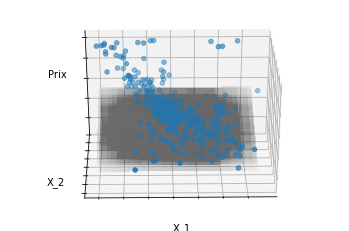

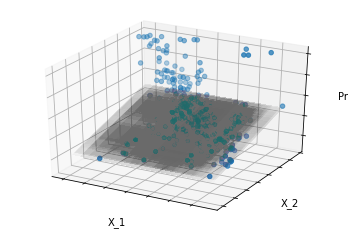

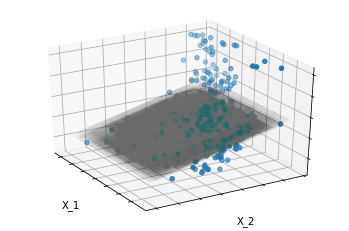

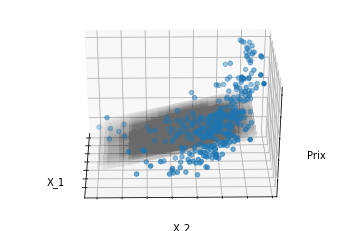

In [ ]:
if len(index_des_attributs) == 1:
  # donc on utilise une droite
  # deux points suffisent pour tracer le modèle
  point1 = x_train.min()
  point2 = x_train.max()
  X = [point1,point2]
  # prédire pour l'ensemble de X
  y_pred = model.predict(X)
  # tracer
  plt.figure()
  plt.ylabel('prix de la maison')
  plt.xlabel('attribut')
  plt.scatter(x_train,y_train)
  plt.plot(X,y_pred,color='red')
  plt.show()
  plt.close()

elif len(index_des_attributs) == 2:
  # deux paramètres à apprendre
  # donc la prédiction c'est un plan

  # boucle sur les angles possibles pour visualiser 3D
  for angle in range(59,180,30):

    # chercher le minimum pour x_1
    minimum_x_1 = x_train[:,0].min()
    # chercher le minimum pour x_2
    minimum_x_2 = x_train[:,1].min()
    # chercher le maximum pour x_1
    maximum_x_1 = x_train[:,0].max()
    # chercher le maximum pour x_2
    maximum_x_2 = x_train[:,1].max()

    # nombre de points que l'on va utiliser pour tracer le plan de prédiction
    nb_points = 100

    # créer la dimension x_1 des points aléatoires
    X_1 = np.random.uniform(low=minimum_x_1,high=maximum_x_1,size=(nb_points,))
    # ajouter une dimension à x_1
    X_1 = X_1.reshape(-1,1)

    # créer la dimension x_2 des points aléatoires
    X_2 =  np.random.uniform(low=minimum_x_2,high=maximum_x_2,size=(nb_points,))
    # ajouter une dimension à x_2
    X_2 = X_2.reshape(-1,1)

    # construire X en cocaténant les deux coordonnées x_1 et x_2
    X = np.concatenate((X_1,X_2),axis=1)

    # créer le plan de x_1 et x_2
    X_1, X_2 = np.meshgrid(X_1, X_2)

    # predire pour cet ensemble de x_1,x_2
    y_pred = model.predict(X)

    # créer la figure
    fig = plt.figure()
    # préciser que c'est 3D
    plot3d = fig.add_subplot(111,projection='3d')
    # chercher les axes
    ax = plt.gca()

    # enlever les valeurs sur les axes (pour une meilleure visualisation)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    # annoter les axes
    ax.set_xlabel('X_1')
    ax.set_ylabel('X_2')
    ax.set_zlabel('Prix')

    # ajouter l'angle de vue
    ax.view_init(elev=None, azim=angle)
    # tracer les points correspondant aux données d'entrainement
    plot3d.scatter(x_train[:,0],x_train[:,1],y_train)
    # tracer les prédictions
    plot3d.plot_surface(X_1,X_2,y_pred,color='white',alpha=0.002)

    plt.show()
    plt.close()

## **Exercices**

### Évaluer sur l'ensemble de test

In [ ]:
# Votre code ici

 ### Corrigé :

In [ ]:
loss = model.evaluate(x_test,y_test,verbose=False)

print("Le taux d'erreur sur l'ensemble du test est:",loss)

Le taux d'erreur sur l'ensemble du test est: 44.99959182739258


### Tracer le prix prédit contre le prix original

In [ ]:
# Votre code ici

 ### Corrigé :

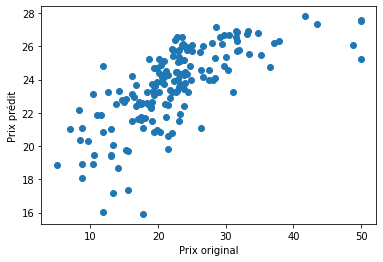

In [ ]:
y_pred=model.predict(x_test,verbose=False)

plt.figure()
plt.scatter(x=y_test, y=y_pred)
plt.xlabel('Prix original')
plt.ylabel('Prix prédit')
plt.show()

### Entrainer un modèle en prenant deux caractéristiques et ajoutant leur produit (relation non-linéaire)

In [ ]:
# Votre code ici

 ### Corrigé :

In [ ]:
# choisir uniquement deux dimensions
index_des_attributs = [5,12]
x_train = X_train[:,index_des_attributs]
x_test = X_test[:,index_des_attributs]

# créer x_3 = x_1*x_2
X_3 = x_train[:,0]*x_train[:,1]
# ajouter une dimension vide pour x_3
X_3 = X_3.reshape(-1,1)
# ajouter x_3 à x_train
x_train = np.concatenate((x_train,X_3),axis=1)

# répéter la même chose pour l'ensemble de test
X_3 = x_test[:,0]*x_test[:,1]
# ajouter une dimension vide pour x_3
X_3 = X_3.reshape(-1,1)
# ajouter x_3 à x_train
x_test = np.concatenate((x_test,X_3),axis=1)

# normaliser
x_train = normalize(x_train)
x_test = normalize(x_test)

# créer le nouveau modèle en commençant par la couche d'entrée
input_shape = x_train.shape[1:]
input_layer = keras.layers.Input(input_shape)
# créer la couche de sortie qui est constituée d'un neurone
output_layer = keras.layers.Dense(units=1, activation='linear')(input_layer)
# créer le modèle en liant l'entrée à la sortie
model = keras.models.Model(inputs=input_layer, outputs=output_layer)
model.summary()
# choisir un taux d'apprentissage
learning_rate = 0.1
# choisir l'algorithme d'optimisation
optimizer_algo = keras.optimizers.SGD(lr=learning_rate)
# choisir la fonction de coût
cost_function = keras.losses.mean_squared_error
# comiler le modèle
model.compile(loss=cost_function,optimizer=optimizer_algo)

# entrainer
mini_batch_size = 16
nb_epochs = 1000
history = model.fit(x_train,y_train,batch_size=mini_batch_size,epochs=nb_epochs,verbose=False)

# evaluer sur le train
loss = model.evaluate(x_train,y_train,verbose=False)
print("Le taux d'erreur sur le train est",loss)

# evaluer sur le test
loss = model.evaluate(x_test,y_test,verbose=False)
print("Le taux d'erreur sur le test est",loss)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Le taux d'erreur sur le train est 27.22667694091797
Le taux d'erreur sur le test est 24.820493698120117


### Tracer la décision pour ce nouveau modèle en fonction des deux caractéristiques `x_1` et `x_2`

In [ ]:
# Votre code ici

 ### Corrigé :

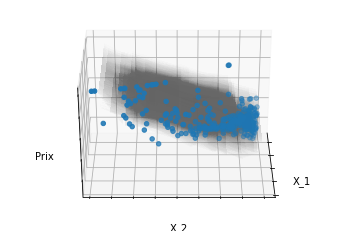

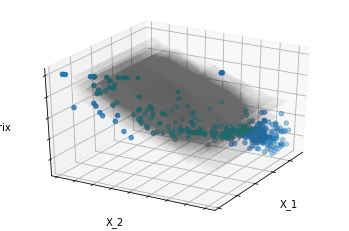

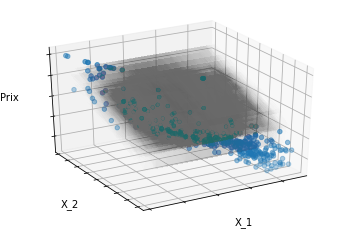

In [ ]:
# boucle sur les angles possibles pour visualiser 3D
for angle in range(0,90,30):
  # chercher le minimum pour x_1
  minimum_x_1 = x_train[:,0].min()
  # chercher le minimum pour x_2
  minimum_x_2 = x_train[:,1].min()
  # chercher le maximum pour x_1
  maximum_x_1 = x_train[:,0].max()
  # chercher le maximum pour x_2
  maximum_x_2 = x_train[:,1].max()

  # nombre de points que l'on va utiliser pour tracer le plan de prédiction
  nb_points = 100

  # créer la dimension x_1 des points aléatoires
  X_1 = np.random.uniform(low=minimum_x_1,high=maximum_x_1,size=(nb_points,))
  # ajouter une dimension à x_1
  X_1 = X_1.reshape(-1,1)

  # créer la dimension x_2 des points aléatoires
  X_2 =  np.random.uniform(low=minimum_x_2,high=maximum_x_2,size=(nb_points,))
  # ajouter une dimension à x_2
  X_2 = X_2.reshape(-1,1)

  # créer la dimension x_3=x_2*x_1
  X_3 = X_1*X_2

  # construire X en concaténant les coordonnées x_1 x_2 x_3
  X = np.concatenate((X_1,X_2,X_3),axis=1)

  # créer le plan de x_1 et x_2
  X_1, X_2 = np.meshgrid(X_1, X_2)

  # predire pour cet ensemble de x_1,x_2,x_3
  y_pred = model.predict(X)

  # créer la figure
  fig = plt.figure()
  # préciser que c'est 3D
  plot3d = fig.add_subplot(111,projection='3d')
  # chercher les axes
  ax = plt.gca()

  # enlever les valeurs sur les axes (pour une meilleure visualisation)
  ax.set_xticklabels([])
  ax.set_yticklabels([])
  ax.set_zticklabels([])
  # annoter les axes
  ax.set_xlabel('X_1')
  ax.set_ylabel('X_2')
  ax.set_zlabel('Prix')
  # ajouter l'angle de vue
  ax.view_init(elev=None, azim=angle)
  # tracer les points correspondant aux données d'entrainement
  plot3d.scatter(x_train[:,0],x_train[:,1],y_train)
  # tracer les prédictions
  plot3d.plot_surface(X_1,X_2,y_pred,color='white',alpha=0.002)

  plt.show()
  plt.close()